# **Aplicación de técnicas de machine learning para la predicción del riesgo de default de un cliente en una compañía de filipinas**

Realizado por: 

* Andrés Medina Báez       cc 1036654885
* Manuela Ramírez Quiceno  cc 1037657504

# 1.Introducción






Home Credit es una empresa de filipinas que busca ofrecer créditos a personas con antecedentes crediticios insuficientes o inexistentes, buscando la inclusión financiera de la población no bancarizada.

Para ello, esta compañía busca utilizar información transaccional y de telecomunicaciones, con el fin de predecir el riesgo de default de sus clientes.


**Principal Objetivo**: ¿Al cliente, le debo o no de otorgar el préstamo a partir de su riesgo de default? 


**Variable Objetivo**: Probabilidad de que el cliente presente retrasos en el pago de su cuota  (1) o no (0)

# 2.Importar librerias

Las librerías a usar en la carga de los datos son:



*   pandas: Para cargar los datos en dataframes.
*   numpy: Para operaciones con matrices, filas y/o columnas
*   matplotlib: Para graficar
*   os: Para interactuar con diferentes rutas
*plotly: Para graficar la matriz de correlación
*sklearn: Para hacer la separación de la data en train y test, y para los modelos de ML y las métricas de evaluación.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import plotly.express as px
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
# Selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 3.Cargar la Data

Se carga el archivo de salida del notebook 09-Preprocesamiento_Data_Elegida.ipynb

In [ ]:
data = pd.read_csv("06-DF_Final_60cols.csv",index_col=0) # Read data
data_original=data.copy()
data.head(5)

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_CREDIT_x,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,...,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,WALLSMATERIAL_MODE_DUROS,WALLSMATERIAL_MODE_ARMABLES,OCCUPATION_TYPE_BAJO,OCCUPATION_TYPE_MEDIO,OCCUPATION_TYPE_ALTO,indice_falta_pagar
0,1,0,0.0,406597.5,26.0,21.0,2,0.262949,1,1,...,0.0,1.0,0.0,1.000000,1,0,1,0,0,0.284122
1,0,0,0.0,1293502.5,46.0,40.0,1,0.622246,0,0,...,1.0,2.0,0.0,1.000000,1,0,0,1,0,0.000000
2,0,1,0.0,135000.0,52.0,8.0,2,0.555912,0,0,...,0.0,1.0,0.0,1.000000,0,0,1,0,0,0.000000
3,0,0,0.0,312682.5,52.0,101.0,2,0.650442,0,0,...,3.0,2.0,0.0,1.000000,0,0,1,0,0,0.000000
4,0,0,0.0,513000.0,55.0,101.0,2,0.322738,0,0,...,4.0,2.0,1.0,1.037038,0,0,0,1,0,0.000000


In [ ]:
data.replace([np.inf, -np.inf], np.nan,inplace=True)

In [ ]:
data['indice_falta_pagar']=data['indice_falta_pagar'].replace(np.nan,0)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295221 entries, 0 to 295236
Data columns (total 60 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   TARGET                                             295221 non-null  int64  
 1   FLAG_OWN_CAR                                       295221 non-null  int64  
 2   CNT_CHILDREN                                       295221 non-null  float64
 3   AMT_CREDIT_x                                       295221 non-null  float64
 4   DAYS_BIRTH                                         295221 non-null  float64
 5   MONTHS_EMPLOYED                                    295221 non-null  float64
 6   REGION_RATING_CLIENT_W_CITY                        295221 non-null  int64  
 7   EXT_SOURCE_2                                       295221 non-null  float64
 8   DEF_30_CNT_SOCIAL_CIRCLE                           295221 non-null  int64 

In [ ]:
len(data.columns)

60

In [ ]:
data['TARGET']=data['TARGET'].astype('category')
data['TARGET'].dtype                                       

CategoricalDtype(categories=[0, 1], ordered=False)

# 4.Partición de la data en train y test

Teniendo en cuenta que nos estamos enfrentando a un problema de data desbalanceada, se realiza la partición garantizando un muestreo estratificado para la variable TARGET

In [ ]:
X = data.drop("TARGET", axis=1)
y= data["TARGET"]

In [ ]:
X.shape, y.shape

((295221, 59), (295221,))

## Split dataset 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state =42, stratify=y)

In [ ]:
perc_test = y_test.value_counts()[1]*100/len(y_test)
perc_train = y_train.value_counts()[1]*100/len(y_train)

print(f"Porcentaje de muestras positivas en el dataset de test={round(perc_test,4)} , y de test={round(perc_train,4)}")

Porcentaje de muestras positivas en el dataset de test=8.0752 , y de test=8.0753


# 5.Selección de la métrica de desempeño del modelo

Selección de la métrica de evaluación: 


En el reto de kaggle piden que la métrica de evaluación sea el área ROC.

El error que más le cuesta al modelo son aquellos clientes que marca como 0, es decir, que no caerán en default, pero en realidad, son un 1. Por esta razón, se busca minimizar el error correspondiente al FN: Falsos Negativos.

> Recall - Sensitivity

(Puede ser recall o F1)

En este caso, un falso negativo tiene un mayor costo en términos de capital que no retorna al banco Home Credit y le toca provisionar y pagar, vs un falso positivo, que son clientes que por el perfil de riesgo adoptado por Home Credit, puede al final tomar la decisión en una etapa posterior si en efecto se debe rechazar al cliente por el resultado del modelo [target = 1], o no.

# 6.Selección de Modelos

## 6.1. Modelar

Para esta iteración se modelará el problema con un modelo de regresión logística, un arbol de decisión, un naive bayes y un random forest.

### 6.1.1 Regresión Logistica

In [ ]:
rl=LogisticRegression(solver='liblinear')
rl.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

### 6.1.2 Árbol de Decisión

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 6.1.3 Naive Bayes

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

### 6.1.4 Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
rfc.fit(X_train,y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### 6.2 Predicción del Modelo

In [ ]:
#Regresion
y_dtc_pred=dtc.predict(X_test)
y_rl_pred=rl.predict(X_test)
y_gnb_pred=gnb.predict(X_test)
y_rfc_pred=rfc.predict(X_test)

In [ ]:
### 2.1.4. Evaluación de los Modelos
print('Accuracy')
print('-------------------------------------------------------------------------------------------------')
print(f"Decision Tree Classifier : Score_entrenamiento:{round(dtc.score(X_train, y_train),4)},    & Score_validacion:{round(accuracy_score(y_test,y_dtc_pred),4)}")
print(f"Logistic Regresion       : Score_entrenamiento:{round(rl.score(X_train, y_train),4)}, & Score_validacion:{round(accuracy_score(y_test,y_rl_pred),4)}")
print(f"Naive Bayes              : Score_entrenamiento:{round(gnb.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_gnb_pred),4)}")
print(f"Random Forest            : Score_entrenamiento:{round(rfc.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_rfc_pred),4)}\n")

print('Recall')
print('-------------------------------------------------------------------------------------------------')
print(f"Decision Tree Classifier : Recall_validacion:{1-round(recall_score(y_test,y_dtc_pred),4)}")
print(f"Logistic Regresion       : Recall_validacion:{1-round(recall_score(y_test,y_rl_pred),4)}")
print(f"Naive Bayes              : Recall_validacion:{1-round(recall_score(y_test,y_gnb_pred),4)}")
print(f"Random Forest            : Recall_validacion:{1-round(recall_score(y_test,y_rfc_pred),4)}")


Accuracy
-------------------------------------------------------------------------------------------------
Decision Tree Classifier : Score_entrenamiento:1.0,    & Score_validacion:0.8561
Logistic Regresion       : Score_entrenamiento:0.9192, & Score_validacion:0.9192
Naive Bayes              : Score_entrenamiento:0.9186,  & Score_validacion:0.9188
Random Forest            : Score_entrenamiento:0.9853,  & Score_validacion:0.9189

Recall
-------------------------------------------------------------------------------------------------
Decision Tree Classifier : Recall_validacion:0.8409
Logistic Regresion       : Recall_validacion:0.9979
Naive Bayes              : Recall_validacion:0.9911
Random Forest            : Recall_validacion:0.9862


In [ ]:
#Classification Report para los modelos 
print(f"Logistic Regresion  Results:\n" 
      f"{classification_report(y_test,y_rl_pred)}\n")

print(f"Naive Bayes Results:\n" 
      f"{classification_report(y_test,y_gnb_pred)}\n")

print(f"Decision tree Results:\n" 
      f"{classification_report(y_test,y_dtc_pred)}\n")

print(f"Random Forest:\n" 
      f"{classification_report(y_test,y_rfc_pred)}\n")

Logistic Regresion  Results:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81415
           1       0.47      0.00      0.00      7152

    accuracy                           0.92     88567
   macro avg       0.69      0.50      0.48     88567
weighted avg       0.88      0.92      0.88     88567


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81415
           1       0.37      0.01      0.02      7152

    accuracy                           0.92     88567
   macro avg       0.65      0.50      0.49     88567
weighted avg       0.88      0.92      0.88     88567


Decision tree Results:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     81415
           1       0.14      0.16      0.15      7152

    accuracy                           0.86     88567
   macro avg       0.54      0.54      0.54     88567

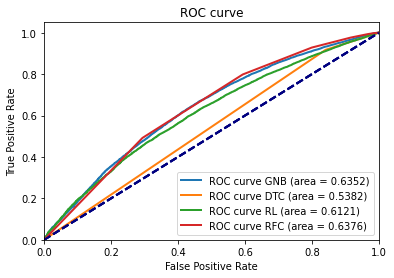

In [ ]:
labels=['Naive Bayes','Decision tree','Logistic Regresion',\
        'Random Forest']
fpr =[]
tpr = []
mod=''

#Complete el código
for i in range(len(labels)):
  fpr.append(0)
  tpr.append(0)
  if i==0:
    y_pred2 = gnb.predict_proba(X_test)
    mod='GNB'
  elif i==1:
    y_pred2 = dtc.predict_proba(X_test)
    mod='DTC'
  elif i==2:
    y_pred2 = rl.predict_proba(X_test)
    mod='RL'
  else:
    y_pred2 = rfc.predict_proba(X_test)
    mod='RFC'
  score = y_pred2[:,0]-y_pred2[:,1]
  fpr[i], tpr[i],_ = roc_curve(y_test,score)
  roc_auc = 1 - auc(fpr[i], tpr[i])
  plt.plot(tpr[i],fpr[i],lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.legend(loc="lower right")
  plt.grid()
plt.show()

# 7.Evaluación sobre el conjunto de Test 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


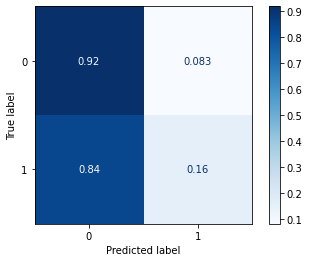

In [ ]:
plot_confusion_matrix(dtc, X_test, y_test,cmap=plt.cm.Blues,normalize='true');

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_dtc_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.15911633109619686

Curva ROC


In [ ]:
y_pred2=gnb.predict_proba(X_test)

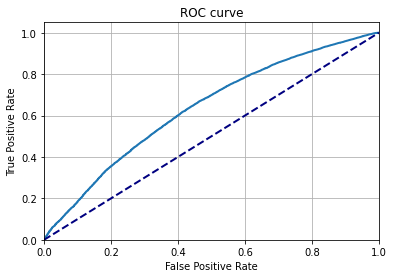

ROC curve Naive Bayes (area = 0.6352)


In [ ]:
fpr =[]
tpr = []
fpr.append(0)
tpr.append(0)
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()
plt.show()
print('ROC curve Naive Bayes (area = {})'.format(round(roc_auc,4)))
